## HW-2 • Math 189 • Wi 2024
### Due Date: Sat, Feb 10th 2024

> NAME: $\color{red}{\text{    Chenyu Li    }}$
> 
> PID: $\color{red}{\text{    A16781926     }}$
>
>
> 

---

## Instructions
* Submit your solutions online on Gradescope
* Look at the detailed instructions [here](https://ucsd-math189-wi24.github.io/syllabus.html#assignments)


I certify that the following write-up is my own work, and have abided by the UCSD Academic Integrity Guidelines.

- [x] Yes
- [ ] No

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

## Configurations
%matplotlib inline

# Question 1

For this question, we will use the following dataset from the UCI Machine Learning Repository: [Heart Disease Data Set](https://archive.ics.uci.edu/ml/datasets/Heart+Disease). To load the dataset, you can use the `ucimlrepo` package in Python. Uncomment the following cell to install the package

In [2]:
!pip install ucimlrepo

You can load the dataset using the following code:

In [3]:
import ucimlrepo
heart_disease = ucimlrepo.fetch_ucirepo(id=45) 
df = heart_disease.data.features

> a. Load the dataset and display the first 5 rows of the dataset.

In [4]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


> b. Create a boxplot of the cholesterol level for each sex in the dataset. Color them differently for each sex. 

/var/folders/xd/r573b57907x3ttrdkg9137j40000gn/T/ipykernel_42782/1689507103.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sex', y='chol', palette='rocket')


<Axes: xlabel='sex', ylabel='chol'>

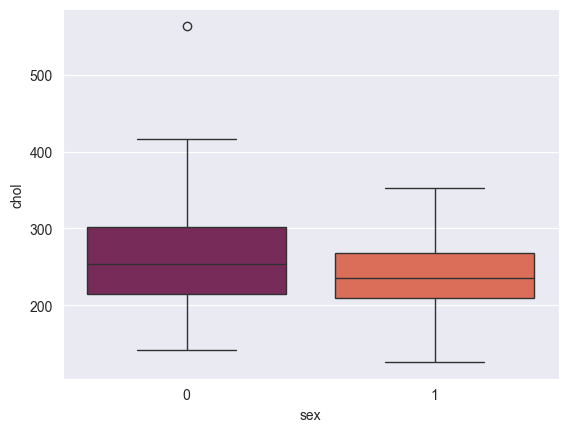

In [7]:
sns.boxplot(data=df, x='sex', y='chol', palette='rocket')

> c. Read the description of the dataset and determine which of `MALE` and `FEMALE` the variable values `sex=1` vs `sex=0` correspond to.

From the website, sex: sex (1 = male; 0 = female)

> d. Using your answer from part c, which of the two sexes has a higher median cholesterol level? Is there reason to believe that there is a difference in the cholesterol levels between the two sexes? Explain your answer

In [8]:
Female = df[df['sex'] == 0]['chol']
Male = df[df['sex'] == 1]['chol']

from scipy.stats import ttest_ind
# Perform the t-test
t_stat, p_val = ttest_ind(Male,Female, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_val}")

T-statistic: -3.06426332754255, P-value: 0.002630521121607227


Based on the answer to part b and part c, we can see that the median cholesterol level is higher for female. From the t test performed above, at significance level of 0.05, we can see that the p value is less than this value. Thus, we can reject our null hypothesis. There's a difference in the cholesterol levels between the two genders.

> e. What is an appropriate hypothesis test to determine if there is a difference in the cholesterol levels between Males and Females?

The t test perfomed above in part d.

> f. Fill in the table below to summarize the key components of the hypothesis test you chose in part e.

| Anatomy of the hypothesis test |                                              Answer                                               |
|:------------------------------:|:-------------------------------------------------------------------------------------------------:|
| Assumption                     | $X_1, X_2, ..., X_n \sim N(\mu_1, \sigma_1^2)$ and $Y_1, Y_2, ..., Y_m \sim N(\mu_2, \sigma_2^2)$ |
| Population parameter           |                                     $\theta = \mu_1 - \mu_2$                                      |
| Sample statistic               |                                        $\bar{X} - \bar{Y}$                                        |
| Test statistic                 |              $T = \frac{(\bar{X} - \bar{Y})}{S_p \sqrt{\frac{1}{n} + \frac{1}{m}}}$               |
| Null hypothesis                |                                         $H_0: \theta = 0$                                         |
| Alternate hypothesis           |                                       $H_1: \theta \neq 0$                                        |
| Rejection region shape         |                      $(t_{\alpha/2}, \infty)$ and $(-\infty, -t_{\alpha/2})$                      |

> g. Perform the hypothesis test you chose in part e. Report the p-value. 

(_You can use the `scipy.stats` package, the `statsmodels` package, or write your own function_)

In [9]:
p_val

0.002630521121607227

> h. State your conclusion at the $\alpha=$ 1% significance level.

 From the t test performed above, at significance level of 0.01, we can see that the p value is less than this value. Thus, we can reject our null hypothesis. There's a difference in the cholesterol levels between the two genders.

> i. Compute the 99% confidence interval for the difference in the mean cholesterol levels between the females and males. 

(_You can use the `scipy.stats` package, the `statsmodels` package, or write your own function_)

In [10]:
mean_diff = np.mean(Male) - np.mean(Female)
std_male = np.std(Male, ddof=1)
std_female = np.std(Female, ddof=1)
n_male = len(Male)
n_female = len(Female)

se_diff = np.sqrt((std_male**2 / n_male) + (std_female**2 / n_female))
df = n_male + n_female - 2
t_critical = stats.t.ppf(0.995, df)  # 99% CI, two-tailed test

margin_error = t_critical * se_diff
ci_lower = mean_diff - margin_error
ci_upper = mean_diff + margin_error

(ci_lower, ci_upper)

(-40.88931087874513, -3.411960265284428)

---

# Question 2

For this question, we are going to use the `adult` dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/adult). You can load the dataset using the following code:

In [11]:
adult = ucimlrepo.fetch_ucirepo(id=2)
df = adult.data.features

> a. Load the dataset and display the first 5 rows of the dataset.

In [12]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


> b. Filter the `df` DataFrame to only keep the rows where the `education` is in `['Bachelors', 'Masters', 'Doctorate']` and display the first 5 rows of the filtered dataset. Rename this to be ``df_filtered`.

In [13]:
filter = ['Bachelors', 'Masters', 'Doctorate']
df_filtered =  df[df['education'].isin(filter)]

> c. Create a table `O_table` of the observed counts for the `sex` (rows) vs. `education` (columns) in the `df_filtered` DataFrame.

In [14]:
O_table = pd.crosstab(df_filtered['sex'], df_filtered['education'])

> d. Create `p_table` as the table of observed proportions for the `education` for each `sex` using the `O_table` from part c.

In [15]:
p_table =  O_table.div(O_table.sum(axis=1), axis=0)

> e. Create a new row in the `p_table` that contains the cumulative proportions of the `education` for the entire dataset. 

In [16]:
p_table["total"] = p_table.sum(axis=0)

> f. What sort of a hypothesis test would you use to determine if there is a difference between the observed proportions of `education` for each `sex`?

Chi-squared test of independence

> g. Fill in the following table describing the anatomy of the hypothesis test.

Here $X_1$ and $X_2$ denote the Multinomial random variables representing the observed counts for the `education` categories corresponding to Females and Males, respectively.

| Anatomy of the hypothesis test |                                                               Answer                                                                |
|:------------------------------:|:-----------------------------------------------------------------------------------------------------------------------------------:|
|           Assumption           | $$X_1 \sim \text{Mult}(p_{11}, p_{12}, p_{13}, p_{14}), \quad\text{and}\quad X_2 \sim \text{Mult}(p_{21}, p_{22}, p_{23}, p_{24})$$ |
|      Population parameter      |                                     True proportions of education levels for each sex, $p_{ij}$                                     |
|        Sample statistic        |                                   Observed frequencies in each category of the contingency table                                    |
|        Null hypothesis         |                                $p_{1j} = p_{2j}$ for all $j$ (education level is independent of sex)                                |
|      Alternate hypothesis      |                           $p_{1j} \neq p_{2j}$ for at least one $j$ (education level is dependent on sex)                           |
|     Rejection region shape     |                       Right-tailed based on the chi-squared distribution with appropriate degrees of freedom                        |

> h. Write down the test statistic $T$ for the hypothesis test in parts f and g. What is its distribution under the null hypothesis?

The test statistic for the chi-squared test of independence is calculated using the formula:

$$
T = \chi^2 = \sum \frac{(O_{ij} - E_{ij})^2}{E_{ij}}
$$

Under the null hypothesis, the test statistic $ T $ follows a chi-squared distribution with degrees of freedom calculated as:

$$
\text{df} = (\text{number of rows} - 1) \times (\text{number of columns} - 1)
$$

For a table with 2 rows (representing the sexes) and 4 columns (representing the education levels), the degrees of freedom would be:

$$
\text{df} = (2 - 1) \times (4 - 1) = 3
$$

Therefore, under the null hypothesis, the distribution of $ T $ is a chi-squared distribution with 3 degrees of freedom.

> i. Compute the observed test statistic using the formula from part h and the data you created in part e.

In [20]:
# Assuming p_table is the table of observed proportions created previously

# Calculate the total counts for rows and columns
row_totals = p_table.iloc[:-1, :].sum(axis=1)
column_totals = p_table.iloc[-1, :-1]
grand_total = row_totals.sum()

# Calculate the expected frequencies for each cell
expected_frequencies = np.outer(row_totals, column_totals) / grand_total

# Calculate the chi-squared statistic
observed_frequencies = p_table.iloc[:-1, :-1].values  # Exclude the 'total' row and column
chi_squared = ((observed_frequencies - expected_frequencies) ** 2 / expected_frequencies).sum()

chi_squared

0.01441264077570666

> j. Compute the p-value of associated with the observed test statistic from part i.

In [24]:
p_table.shape[1]

4

In [26]:
from scipy.stats import chi2

dfreedom = (p_table.shape[0] - 1) * (p_table.shape[1] - 1)

# Compute the p-value
p_value = chi2.sf(chi_squared, dfreedom)

p_value

0.9995417978480412

> k. State your conclusion at the $\alpha=$ 5% significance level.

At the 5% significance level, there is insufficient evidence to conclude that there is a significant association between `sex` and `education` in the population.